[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1xPYRL3nIuJ5u-joaljVoa2AHv7U-RiZN)

This notebook read bottom values from an Echoview `.evl` file and plots them superimposed on the corresponing sonar data.

In [1]:
# importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# mounting the google drive
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# installing echopype
!pip install echopype

In [4]:
# clone the echoregions repo
!git clone https://github.com/OSOceanAcoustics/echoregions

fatal: destination path 'echoregions' already exists and is not an empty directory.


In [5]:
cd echoregions

/content/echoregions


In [6]:
import echoregions as er

In [7]:
# reading filenames
# import glob
# evl_filelist = glob.glob(EVL_PATH+'/*.evl')
# print('There are '+ str(len(evl_filelist)) + ' files(transects).')

### Bottom Data Reading

In [8]:
# check the file which has bottom lines overlapping with the sample of sonar files on Google Drive
!tail /content/drive/Shareddrives/pacific_hake_survey/EchoviewExports/Lines/x4.bottom.evl

20170627 0245240145  706.949141 3 
20170627 0245298685  706.949141 3 
20170627 0245357185  706.302180 3 
20170627 0245386420  706.302180 3 
20170627 0245386430  708.397149 3 
20170627 0246226395  720.535337 3 
20170627 0246387260  738.259024 3 
20170627 0246387270  737.629303 3 
20170627 0246505320  760.406740 3 
20170627 0355069510  759.593260 0 


In [9]:
!head -n 5 /content/drive/Shareddrives/pacific_hake_survey/EchoviewExports/Lines/x4.bottom.evl

﻿EVBD 3 9.0.279.33861
22452 
20170120 1127370340  17.518239 3 
20170120 1127380440  16.886161 3 
20170120 1127390550  16.537958 3 


In [10]:
# path to evr files
EVL_PATH = '/content/drive/Shareddrives/pacific_hake_survey/EchoviewExports/Lines'

In [11]:
# read that specific file
line = er.read_evl(os.path.join(EVL_PATH, 'x4.bottom.evl'))
line

`line` is a specialized object but we can convert it to a simple `dataframe` so that it is easier to use forward.

In [12]:
# convert the line object to a dataframe
line_df = line.to_dataframe()

In [13]:
line_df

,file_name,file_type,file_format_number,echoview_version,ping_time,depth,status
0,x4.bottom,EVBD,3,9.0.279.33861,D20170120T1127370340,17.518239,3
1,x4.bottom,EVBD,3,9.0.279.33861,D20170120T1127380440,16.886161,3
2,x4.bottom,EVBD,3,9.0.279.33861,D20170120T1127390550,16.537958,3
3,x4.bottom,EVBD,3,9.0.279.33861,D20170120T1127400680,17.494361,3
4,x4.bottom,EVBD,3,9.0.279.33861,D20170120T1127410790,17.459570,3
...,...,...,...,...,...,...,...
22447,x4.bottom,EVBD,3,9.0.279.33861,D20170627T0246226395,720.535337,3
22448,x4.bottom,EVBD,3,9.0.279.33861,D20170627T0246387260,738.259024,3
22449,x4.bottom,EVBD,3,9.0.279.33861,D20170627T0246387270,737.629303,3
22450,x4.bottom,EVBD,3,9.0.279.33861,D20170627T0246505320,760.406740,3


In [14]:
# status 3 are good points
line_df = line_df[line_df['status']=='3']

In [15]:
# convert the datetime column from string to a Python datetime object
line_df['ping_time'] = pd.to_datetime(line_df['ping_time'].str.replace('T','').str.replace('D',''), format = '%Y%m%d%H%M%S%f')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# extract only the ping_time and depth columns
bottom = line_df[['ping_time','depth']]
bottom

,ping_time,depth
0,2017-01-20 11:27:37.034000,17.518239
1,2017-01-20 11:27:38.044000,16.886161
2,2017-01-20 11:27:39.055000,16.537958
3,2017-01-20 11:27:40.068000,17.494361
4,2017-01-20 11:27:41.079000,17.459570
...,...,...
22446,2017-06-27 02:45:38.643000,708.397149
22447,2017-06-27 02:46:22.639500,720.535337
22448,2017-06-27 02:46:38.726000,738.259024
22449,2017-06-27 02:46:38.727000,737.629303


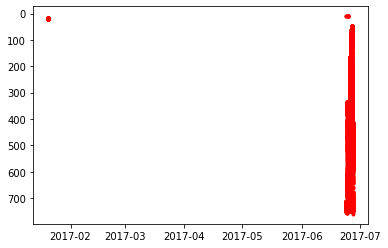

In [17]:
plt.plot(bottom['ping_time'], bottom['depth'],'r.')
plt.gca().invert_yaxis()

It is intereseting that the bottom contains observation from 2017-01-20 to 2017-6-27: mostly empty in the middle. We will create a small filter function to select the bottom only for certain dates.

In [18]:
def filter_bottom(bottom, start_date, end_date):
  """ 
    filter_bottom selects the values of the bottom between two dates
  """
  after_start_date = bottom["ping_time"] > start_date
  before_end_date = bottom["ping_time"] < end_date
  between_two_dates = after_start_date & before_end_date
  filtered_bottom = bottom.loc[between_two_dates]
  
  return(filtered_bottom)

We will only consider annotations from 2017-06-25 (for which we have processed sonar data).

In [19]:
start_date = "2017-06-25"
end_date = "2017-06-26"

filtered_bottom = filter_bottom(bottom, start_date, end_date)

(array([736505.625     , 736505.66666667, 736505.70833333, 736505.75      ,
        736505.79166667, 736505.83333333, 736505.875     , 736505.91666667,
        736505.95833333, 736506.        ]),
 <a list of 10 Text major ticklabel objects>)

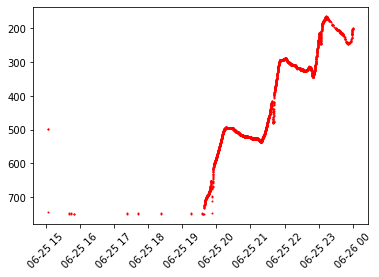

In [20]:
plt.plot(filtered_bottom['ping_time'], filtered_bottom['depth'],'ro',fillstyle='full', markersize=1)
plt.gca().invert_yaxis()
plt.xticks(rotation=45)

In [21]:
# save it to a csv file
filtered_bottom.to_csv('/content/drive/Shareddrives/pacific_hake_survey/bottom-20170725.csv')

### Sonar Data Reading
Here we will plot the backscatter for the set of files we have stored on Google Drive. We will just look at one frequency for simplicity.


In [22]:
import xarray as xr

In [23]:
SONAR_PATH_Sv = '/content/drive/Shareddrives/pacific_hake_survey/hake_Sv_nc/'
SONAR_PATH_raw = '/content/drive/Shareddrives/pacific_hake_survey/hake_nc/'

In [24]:
# reading the processed Sv data
ds_Sv = xr.open_mfdataset(os.path.join(SONAR_PATH_Sv, '*.nc'))

In [25]:
# reading the processed platform data
ds_plat = xr.open_mfdataset(os.path.join(SONAR_PATH_raw, '*.nc'), group='Platform')

In [26]:
# assuming water levels are same for different frequncies and location_time
depth = ds_plat.water_level.isel(location_time=0, frequency=0, ping_time=0)+ds_Sv.range.isel(frequency=0, ping_time=0)

In [27]:
# creating a new depth dimension
ds_Sv['depth'] = depth
ds_Sv = ds_Sv.swap_dims({'range_bin': 'depth'})

Plotting Sonar and Bottom

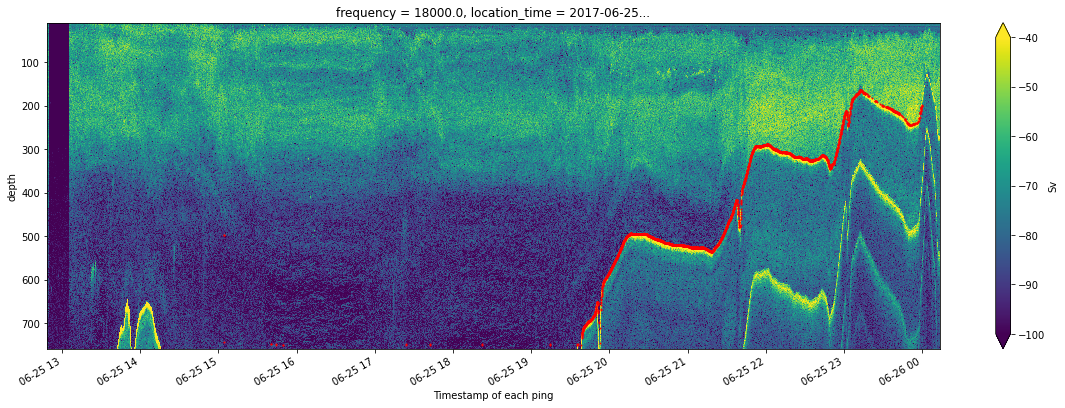

In [28]:
# plotting the sonar data and the bottom
plt.figure(figsize = (20, 6))
ds_Sv.Sv.isel(frequency=0).T.plot(yincrease=False, vmax=-40, vmin=-100)
plt.plot(filtered_bottom['ping_time'], filtered_bottom['depth'],'ro',fillstyle='full', markersize=1)

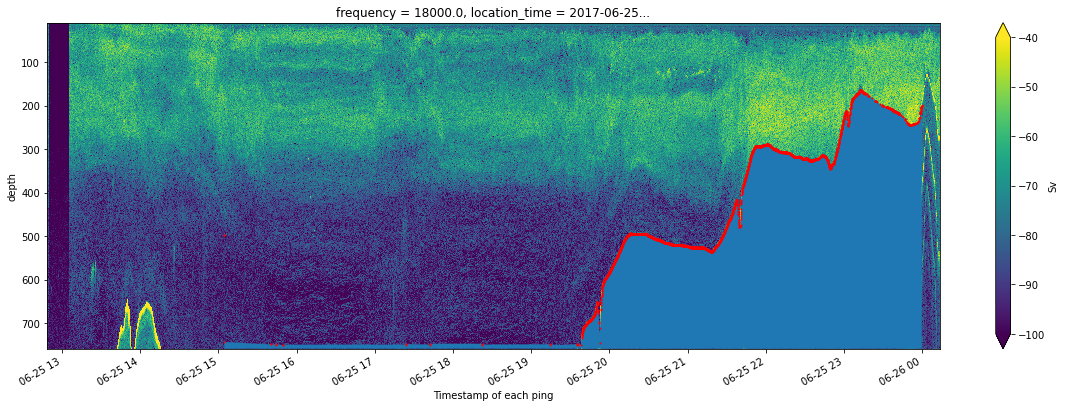

In [29]:
# plot filled bottom
plt.figure(figsize = (20, 6))
ds_Sv.Sv.isel(frequency=0).T.plot(yincrease=False, vmax=-40, vmin=-100)
plt.plot(filtered_bottom['ping_time'], filtered_bottom['depth'],'ro',fillstyle='full', markersize=1)
plt.fill_between(filtered_bottom['ping_time'], ds_Sv.Sv.depth.max(), filtered_bottom['depth'], interpolate = False)

Note that this filling interpolates between the points which is not desirable when the bottom points are very sparse.